# Diplodatos Kaggle Competition

We present this peace of code to create the baseline for the competition, and as an example of how to deal with these kind of problems. The main goals are that you:

1. Learn
1. Try different models and see which one fits the best the given data
1. Get a higher score than the given one in the current baseline example
1. Try to get the highest score in the class :)

In [1]:
# Import the required packages
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Read the *original* dataset...

In [2]:
original_df = pd.read_csv('../data/train.csv')

In [3]:
original_df.columns

Index(['TripType', 'VisitNumber', 'Weekday', 'Upc', 'ScanCount',
       'DepartmentDescription', 'FinelineNumber'],
      dtype='object')

**TripType** is the column that we should predict. That column is not present in the test set

In [4]:
original_df.describe()

,TripType,VisitNumber,Upc,ScanCount,FinelineNumber
count,453411.000000,453411.000000,4.505590e+05,453411.000000,450559.000000
mean,58.027039,95909.846115,3.075243e+10,1.108584,3727.366554
std,155.973370,55399.801147,9.163940e+10,0.707029,2779.958546
min,3.000000,5.000000,8.340000e+02,-10.000000,0.000000
25%,27.000000,49390.000000,3.400004e+09,1.000000,1404.000000
50%,39.000000,96781.000000,7.056082e+09,1.000000,3352.000000
75%,40.000000,143930.000000,3.013201e+10,1.000000,5501.000000
max,999.000000,191347.000000,9.789707e+11,71.000000,9998.000000


In [5]:
original_df.head()

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
0,999,5,Friday,6.811315e+10,-1,FINANCIAL SERVICES,1000.0
1,8,9,Friday,1.070081e+09,1,IMPULSE MERCHANDISE,115.0
2,8,9,Friday,3.107000e+03,1,PRODUCE,103.0
3,8,9,Friday,4.011000e+03,1,PRODUCE,5501.0
4,8,10,Friday,6.414410e+09,1,DSD GROCERY,2008.0


Looking into the columns values...

In [6]:
set(original_df.Weekday)

{'Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday'}

In [7]:
set(original_df.DepartmentDescription)

{'1-HR PHOTO',
 'ACCESSORIES',
 'AUTOMOTIVE',
 'BAKERY',
 'BATH AND SHOWER',
 'BEAUTY',
 'BEDDING',
 'BOOKS AND MAGAZINES',
 'BOYS WEAR',
 'BRAS & SHAPEWEAR',
 'CAMERAS AND SUPPLIES',
 'CANDY, TOBACCO, COOKIES',
 'CELEBRATION',
 'COMM BREAD',
 'CONCEPT STORES',
 'COOK AND DINE',
 'DAIRY',
 'DSD GROCERY',
 'ELECTRONICS',
 'FABRICS AND CRAFTS',
 'FINANCIAL SERVICES',
 'FROZEN FOODS',
 'FURNITURE',
 'GIRLS WEAR, 4-6X  AND 7-14',
 'GROCERY DRY GOODS',
 'HARDWARE',
 'HEALTH AND BEAUTY AIDS',
 'HOME DECOR',
 'HOME MANAGEMENT',
 'HORTICULTURE AND ACCESS',
 'HOUSEHOLD CHEMICALS/SUPP',
 'HOUSEHOLD PAPER GOODS',
 'IMPULSE MERCHANDISE',
 'INFANT APPAREL',
 'INFANT CONSUMABLE HARDLINES',
 'JEWELRY AND SUNGLASSES',
 'LADIES SOCKS',
 'LADIESWEAR',
 'LARGE HOUSEHOLD GOODS',
 'LAWN AND GARDEN',
 'LIQUOR,WINE,BEER',
 'MEAT - FRESH & FROZEN',
 'MEDIA AND GAMING',
 'MENS WEAR',
 'MENSWEAR',
 'OFFICE SUPPLIES',
 'OPTICAL - FRAMES',
 'OPTICAL - LENSES',
 'OTHER DEPARTMENTS',
 'PAINT AND ACCESSORIES',
 'PER

There are `nan`s in the column, let us find them...

In [8]:
original_df[original_df.DepartmentDescription.isna()]

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
739,999,484,Friday,NaN,-2,NaN,NaN
740,999,484,Friday,NaN,-2,NaN,NaN
1292,32,845,Friday,NaN,1,NaN,NaN
1293,32,845,Friday,NaN,1,NaN,NaN
1577,40,1004,Friday,NaN,1,NaN,NaN
...,...,...,...,...,...,...,...
449840,40,190133,Sunday,NaN,1,NaN,NaN
450036,999,190182,Sunday,NaN,-1,NaN,NaN
450163,40,190230,Sunday,NaN,1,NaN,NaN
450361,39,190309,Sunday,NaN,1,NaN,NaN


When the description is NaN, then the Upc and FinelineNumber are both NaN?

In [9]:
(original_df.DepartmentDescription.isna().sum(),
 (original_df.DepartmentDescription.isna() & original_df.Upc.isna() & original_df.FinelineNumber.isna()).sum())

(972, 972)

In [10]:
original_df[original_df.Upc.isna()]

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
739,999,484,Friday,NaN,-2,NaN,NaN
740,999,484,Friday,NaN,-2,NaN,NaN
900,5,585,Friday,NaN,1,PHARMACY RX,NaN
944,5,619,Friday,NaN,1,PHARMACY RX,NaN
945,5,619,Friday,NaN,1,PHARMACY RX,NaN
...,...,...,...,...,...,...,...
449840,40,190133,Sunday,NaN,1,NaN,NaN
450036,999,190182,Sunday,NaN,-1,NaN,NaN
450163,40,190230,Sunday,NaN,1,NaN,NaN
450361,39,190309,Sunday,NaN,1,NaN,NaN


But it may be the case that Upc is NaN but not the description...

In [11]:
(original_df.Upc.isna().sum(),
 original_df.FinelineNumber.isna().sum(),
 (original_df.FinelineNumber.isna() & original_df.Upc.isna()).sum())

(2852, 2852, 2852)

Upc and FinelineNumber are both NaN at the same time

Our last step in this analysis is to see how balanced is the data...

In [12]:
bins = set(original_df.TripType)

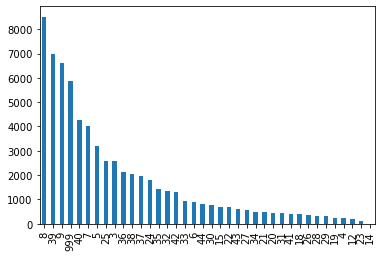

In [13]:
# to count the TripType values, we have to group the visits by VisitNumber
original_df.groupby("VisitNumber").TripType.mean().value_counts().plot(kind='bar')

In [14]:
# !pip install imblearn
from imblearn.over_sampling import SMOTE

In [15]:
X_temp = original_df.iloc[:,1:]

In [16]:
y_temp = original_df.iloc[:,:1]

In [17]:
# oversample = SMOTE(random_state=42, k_neighbors=3)
# X, y = oversample.fit_resample(X_temp, y_temp)

from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_sample(X_temp, y_temp)

# print('Removed indexes:', id_rus)

# plot_2d_space(X_rus, y_rus, 'Random under-sampling')

In [18]:
new_df = pd.concat([X_rus, y_rus], axis=1)

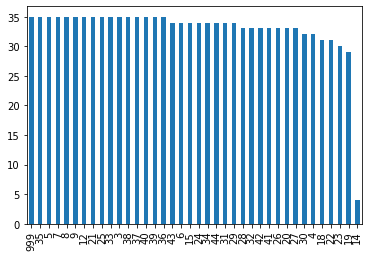

In [19]:
new_df.groupby("VisitNumber").TripType.mean().value_counts().plot(kind='bar')

In [20]:
new_df

,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber,TripType
0,160347,Tuesday,6.053886e+10,1,FINANCIAL SERVICES,0.0,3
1,24744,Monday,6.811316e+10,1,FINANCIAL SERVICES,278.0,3
2,95236,Saturday,6.053881e+10,1,FINANCIAL SERVICES,278.0,3
3,56288,Sunday,6.053886e+10,1,FINANCIAL SERVICES,0.0,3
4,157019,Tuesday,8.303240e+10,1,IMPULSE MERCHANDISE,1001.0,3
...,...,...,...,...,...,...,...
1325,163669,Wednesday,2.127666e+09,2,HOME MANAGEMENT,7106.0,999
1326,131145,Friday,7.245041e+10,-1,PAINT AND ACCESSORIES,1021.0,999
1327,39749,Thursday,7.004878e+09,-1,HOUSEHOLD CHEMICALS/SUPP,7510.0,999
1328,57058,Sunday,3.400000e+09,1,IMPULSE MERCHANDISE,100.0,999


**Unbalanced!!!**

Create a function to load the datasets.

**Some important decisions made here**:
1. We will use one hot encoding for Weekday and DepartmentDescription. All transformations are applied to the training and testing datasets...
1. We are handling NaN's as another category. This may not be the best approach.
1. We may have multiple records for one single visit and the goal is to classify all those records the exact same way. Therefore, we will prepare the data in a way that all the information for a visit is in the same record.
1. Based on the last bullet, we will count the DepartmentDescription for all items acquired in the same visit.
1. We drop the Upc and FinelineNumber to simplify the process. You may use it as they have a lot of information (may be using one-hot encoding for them as well)

The following operations will be performed in a function. Anyway, we present them here so that we can see them in action:

First, we drop the columns. We include TripType as we are going to treat it differently:

In [21]:
df = original_df.drop(["TripType"], axis=1)

In [22]:
df

,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
0,5,Friday,6.811315e+10,-1,FINANCIAL SERVICES,1000.0
1,9,Friday,1.070081e+09,1,IMPULSE MERCHANDISE,115.0
2,9,Friday,3.107000e+03,1,PRODUCE,103.0
3,9,Friday,4.011000e+03,1,PRODUCE,5501.0
4,10,Friday,6.414410e+09,1,DSD GROCERY,2008.0
...,...,...,...,...,...,...
453406,191344,Sunday,7.315096e+10,1,BEAUTY,3405.0
453407,191344,Sunday,6.505300e+10,1,WIRELESS,1712.0
453408,191344,Sunday,7.918131e+09,1,BEAUTY,3405.0
453409,191347,Sunday,4.190008e+09,1,DAIRY,1512.0


Now, we create the dummy columns

In [23]:
df = pd.get_dummies(df, columns=["DepartmentDescription"], dummy_na=True)

In [24]:
df

,VisitNumber,Weekday,Upc,ScanCount,FinelineNumber,DepartmentDescription_1-HR PHOTO,DepartmentDescription_ACCESSORIES,DepartmentDescription_AUTOMOTIVE,DepartmentDescription_BAKERY,DepartmentDescription_BATH AND SHOWER,...,DepartmentDescription_SEASONAL,DepartmentDescription_SERVICE DELI,DepartmentDescription_SHEER HOSIERY,DepartmentDescription_SHOES,DepartmentDescription_SLEEPWEAR/FOUNDATIONS,DepartmentDescription_SPORTING GOODS,DepartmentDescription_SWIMWEAR/OUTERWEAR,DepartmentDescription_TOYS,DepartmentDescription_WIRELESS,DepartmentDescription_nan
0,5,Friday,6.811315e+10,-1,1000.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,Friday,1.070081e+09,1,115.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9,Friday,3.107000e+03,1,103.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,Friday,4.011000e+03,1,5501.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,10,Friday,6.414410e+09,1,2008.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
453406,191344,Sunday,7.315096e+10,1,3405.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
453407,191344,Sunday,6.505300e+10,1,1712.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
453408,191344,Sunday,7.918131e+09,1,3405.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
453409,191347,Sunday,4.190008e+09,1,1512.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Now, we group by the VisitNumber and Weekday (they should be the same), and add all values for ScanCount, and the one-hot encoding of DepartmentDescriptioin

In [25]:
df = df.groupby(["VisitNumber", "Weekday"], as_index=False).sum()

In [26]:
df

,VisitNumber,Weekday,Upc,ScanCount,FinelineNumber,DepartmentDescription_1-HR PHOTO,DepartmentDescription_ACCESSORIES,DepartmentDescription_AUTOMOTIVE,DepartmentDescription_BAKERY,DepartmentDescription_BATH AND SHOWER,...,DepartmentDescription_SEASONAL,DepartmentDescription_SERVICE DELI,DepartmentDescription_SHEER HOSIERY,DepartmentDescription_SHOES,DepartmentDescription_SLEEPWEAR/FOUNDATIONS,DepartmentDescription_SPORTING GOODS,DepartmentDescription_SWIMWEAR/OUTERWEAR,DepartmentDescription_TOYS,DepartmentDescription_WIRELESS,DepartmentDescription_nan
0,5,Friday,6.811315e+10,-1,1000.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,Friday,1.070088e+09,3,5719.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,10,Friday,1.700927e+10,3,10073.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,11,Friday,2.273895e+10,4,7499.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,12,Friday,1.832173e+11,7,15639.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67024,191329,Sunday,5.830656e+11,20,75311.0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
67025,191337,Sunday,2.659169e+11,27,113908.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
67026,191343,Sunday,4.516225e+11,9,33991.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
67027,191344,Sunday,1.614572e+11,5,15127.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [27]:
def transform_data(train_data_fname, test_data_fname):
    df_train = pd.read_csv(train_data_fname)
    df_train['is_train_set'] = 1
    df_test = pd.read_csv(test_data_fname)
    df_test['is_train_set'] = 0

    # we  get the TripType for the train set. To do that, we group by VisitNumber and
    # then we get the max (or min or avg)
    y = df_train.groupby(["VisitNumber", "Weekday"], as_index=False).max().TripType

    # we remove the TripType now, and concat training and testing data
    # the concat is done so that we have the same columns for both datasets
    # after one-hot encoding
    df_train = df_train.drop("TripType", axis=1)
    df = pd.concat([df_train, df_test])
    
    # the next three operations are the ones we have just presented in the previous lines
    
    # drop the columns we won't use (it may be good to use them somehow)
    # df = df.drop(["Upc", "FinelineNumber"], axis=1)

    # one-hot encoding for the DepartmentDescription
    df = pd.get_dummies(df, columns=["DepartmentDescription"], dummy_na=True)

    # now we add the groupby values
    df = df.groupby(["VisitNumber", "Weekday"], as_index=False).sum()
    
    # finally, we do one-hot encoding for the Weekday
    df = pd.get_dummies(df, columns=["Weekday"], dummy_na=True)

    # get train and test back
    df_train = df[df.is_train_set != 0]
    df_test = df[df.is_train_set == 0]
    
    X = df_train.drop(["is_train_set"], axis=1)
    yy = None
    XX = df_test.drop(["is_train_set"], axis=1)

    return X, y, XX, yy

Load the data...

In [28]:
X, y, XX, yy = transform_data("../data/train.csv", "../data/test.csv")
# X, y, XX, yy = transform_data(new_df, "../data/test.csv")

Create the model and evaluate it

In [29]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_sample(X, y)

In [30]:
# split training dataset into train and "validation" 
# (we won't be using validation set in this example, because of the cross-validation;
# but it could be useful for you depending on your approach)
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X_rus, y_rus, test_size=0.3, random_state=42)

In [31]:
# results dataframe is used to store the computed results
results = pd.DataFrame(columns=('clf', 'best_acc'))

In [32]:
# # we will use a DesicionTree to classify and GridSearch to determine the parameters
# from sklearn.tree import DecisionTreeClassifier as DT
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import accuracy_score

# tree_param = {'criterion':('gini', 'entropy'), 'min_samples_leaf':(1, 2, 5),
#               'min_samples_split':(2, 3, 5, 10, 50, 100)}
# tree = DT(random_state=42)
# tree_clf = GridSearchCV(tree, tree_param, cv=3, scoring='accuracy') #scoring='balanced_accuracy')
# tree_clf.fit(X_train, y_train)
# best_tree_clf = tree_clf.best_estimator_

In [33]:
# print('Best Decision Tree accuracy: ', tree_clf.best_score_)
# print(best_tree_clf)
# results = results.append({'clf': best_tree_clf, 'best_acc': tree_clf.best_score_}, ignore_index=True)

# print('The best classifier so far is: ')
# print(results.loc[results['best_acc'].idxmax()]['clf'])

**And finally**, we predict the unknown label for the testing set

### Probamos con un modelo de RandomForestClassifier

In [34]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [35]:
rfc=RandomForestClassifier(random_state=42)

param_grid = { 
    'n_estimators':[50, 100, 150, 200, 250],
    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion' :['gini', 'entropy']
}

rfc_clf = GridSearchCV(rfc, param_grid, cv= 3, scoring='accuracy')
rfc_clf.fit(X_train, y_train)
best_rfc_clf = rfc_clf.best_estimator_

/Users/Matias/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(("The least populated class in y has only %d"


In [36]:
print('Best RF accuracy: ', rfc_clf.best_score_)
print(best_rfc_clf)
results = results.append({'clf': best_rfc_clf, 'best_acc': rfc_clf.best_score_}, ignore_index=True)

print('The best classifier so far is: ')
print(results.loc[results['best_acc'].idxmax()]['clf'])

Best RF accuracy:  0.35873015873015873
RandomForestClassifier(max_features='log2', n_estimators=250, random_state=42)
The best classifier so far is: 
RandomForestClassifier(max_features='log2', n_estimators=250, random_state=42)


### Predicciones con el set de Validacion. 
predecimos los valores para X_valid y los comparamos con los valores de y_valid.

In [37]:
results

,clf,best_acc
0,"(DecisionTreeClassifier(max_features='log2', r...",0.35873


In [38]:
yy_predict = results.loc[results['best_acc'].idxmax()]['clf'].predict(X_valid)

In [39]:
print(results.loc[results['best_acc'].idxmax()]['clf'])
print(accuracy_score(y_valid, yy_predict))

RandomForestClassifier(max_features='log2', n_estimators=250, random_state=42)
0.21739130434782608


### Paso Final, predecir yy dado XX (set de datos de test)

In [40]:
X.shape, XX.shape

((67029, 81), (28645, 81))

In [41]:
yy = results.clf.iloc[0].predict(XX)

The last thing we do is generating a file that should be *submitted* on kaggle

In [42]:
submission = pd.DataFrame(list(zip(XX.VisitNumber, yy)), columns=["VisitNumber", "TripType"])

In [43]:
submission.to_csv("../data/submissionRF1.csv", header=True, index=False)